## *Importing Modules* 

In [1]:
import pandas as pd
import numpy as np
from numpy.random import randint 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

## *Reading the file*

In [2]:
data = pd.read_csv("Clean_Dataset.csv", delimiter=',', encoding = "utf-8")

## *Data Description*

**The various features of the cleaned dataset are explained below:** 

 **1) Airline:** The name of the airline company is stored in the airline column. It is a categorical feature having 6 different  airlines.     
 **2) Flight:** Flight stores information regarding the plane's flight code. It is a categorical feature.    
 **3) Source City:** City from which the flight takes off. It is a categorical feature having 6 unique cities.     
 **4) Departure Time:** This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.      
 **5) Stops:** A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.      
 **6) Arrival Time:** This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.     
 **7) Destination City:** City where the flight will land. It is a categorical feature having 6 unique cities.     
 **8) Class:** A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.    
 **9) Duration:** A continuous feature that displays the overall amount of time it takes to travel between cities in hours.   
 **10)Days Left:** This is a derived characteristic that is calculated by subtracting the trip date by the booking date.   
 **11) Price:** Target variable stores information of the ticket price.    

## *Data Analysis*

In [3]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
data.describe(include = "object")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [6]:
data.describe(include = "float")

,duration
count,300153.000000
mean,12.221021
std,7.191997
min,0.830000
25%,6.830000
50%,11.250000
75%,16.170000
max,49.830000


## *Data Visualization*

<AxesSubplot:xlabel='price', ylabel='Count'>

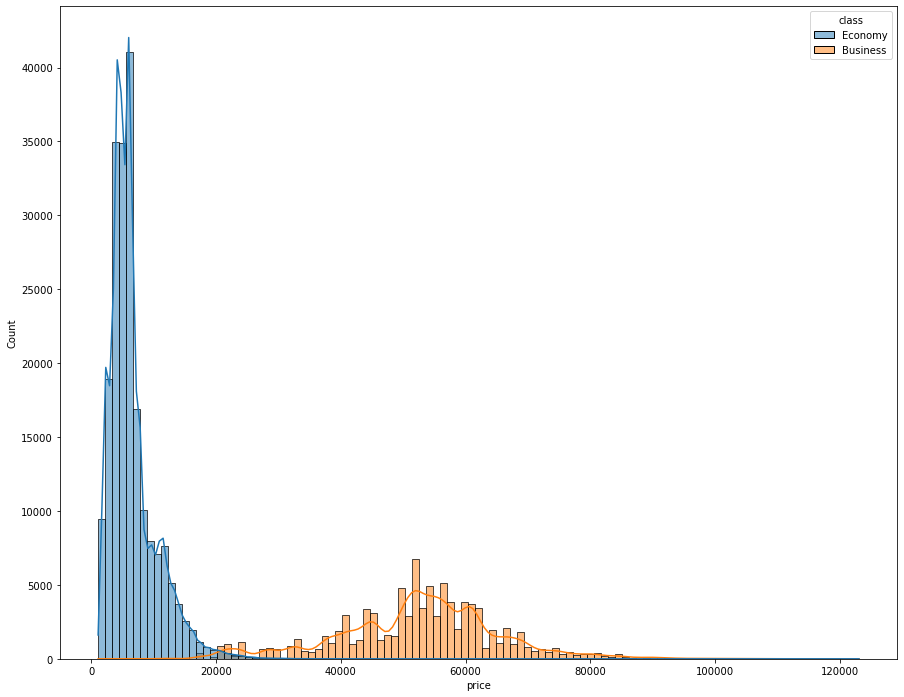

In [7]:
plt.figure(figsize=(15,12))
sns.histplot(data, x="price", kde=True,hue='class')

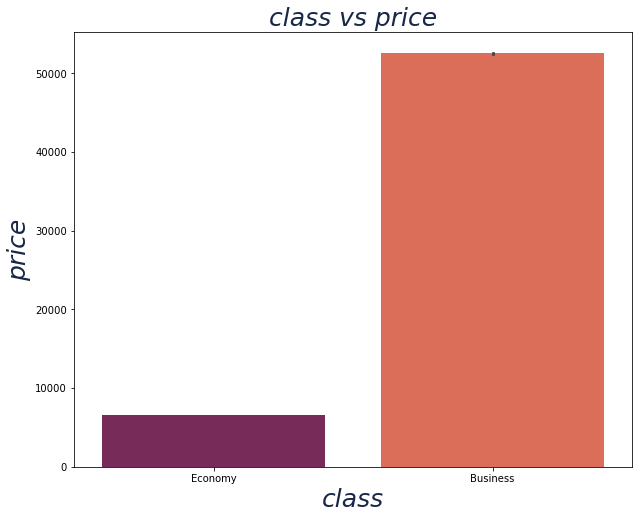

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(x='class',data=data,y='price',palette='rocket')
plt.xlabel(fontsize=25,color='#182747',xlabel='class',fontstyle='italic')
plt.ylabel(fontsize=25,color='#182747',ylabel='price',fontstyle='italic')
plt.title(label='class vs price',fontsize=25,color='#182747',fontstyle='italic')
plt.rcParams["figure.figsize"] = (10,7)
plt.show()

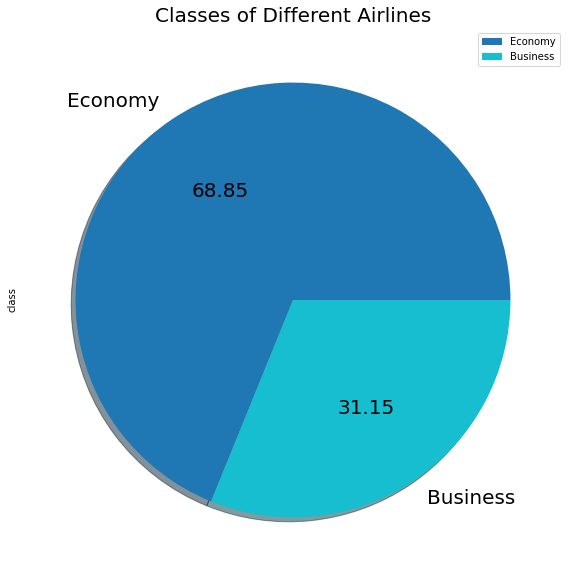

In [9]:
plt.figure(figsize=(12,10))
data['class'].value_counts().plot(kind='pie',textprops={'color':'black', 'fontsize': 20},autopct='%.2f',cmap='tab10', shadow=True)
plt.title('Classes of Different Airlines',fontsize=20)
plt.legend(['Economy','Business'])
plt.show()

### *Economy class customers are a way more than business class, while the price of business class is higher.*

<br>

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


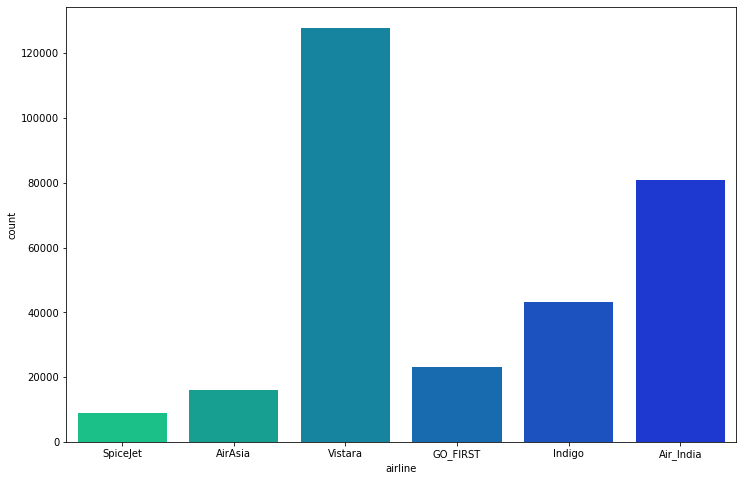

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(data['airline'], palette='winter_r');

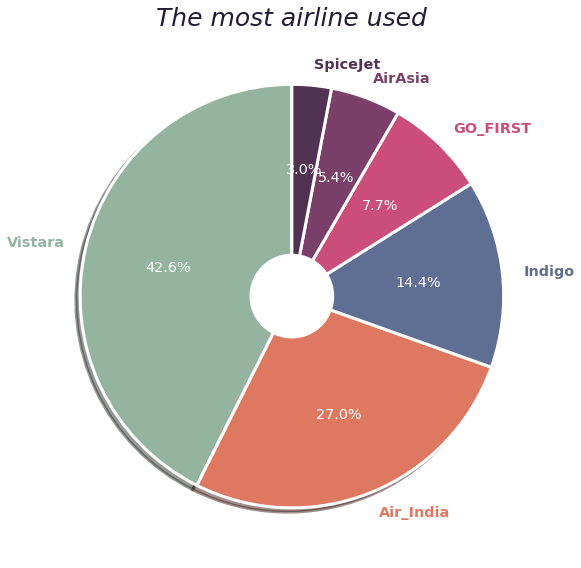

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
colors=['#94B49F','#DF7861','#5F6F94','#CA4E79','#7A4069','#513252']
colors2=['#A1C298','#C6EBC5','#FBF2C','#FFA7070','#DF7861','#F5C7A9']
patches, texts, pcts = ax.pie(
    data.airline.value_counts(), labels=[*data.airline.value_counts().index],shadow=True, autopct='%.1f%%',colors=colors,
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
centre_circle = plt.Circle((0,0),0.20,fc='white') 
plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()
plt.title(label='The most airline used',fontsize=25,color='#251B37',fontstyle='italic')
plt.tight_layout()

### *Vistara is the most used airline, followed by Air_India*

In [12]:
data.groupby(['airline','flight']).count()

Unnamed: 0  source_city  departure_time  stops  arrival_time  \
airline flight                                                                  
AirAsia I5-1228         144          144             144    144           144   
        I5-1229         408          408             408    408           408   
        I5-1321          83           83              83     83            83   
        I5-1426         139          139             139    139           139   
        I5-1427           2            2               2      2             2   
...                     ...          ...             ...    ...           ...   
Vistara UK-988         1381         1381            1381   1381          1381   
        UK-993          911          911             911    911           911   
        UK-994         1273         1273            1273   1273          1273   
        UK-995         1024         1024            1024   1024          1024   
        UK-996         1266         1266            1266   1266          1266   

                 destination_city  class  duration  days_left  price  
airline flight                                                        
AirAsia I5-1228               144    144       144        144    144  
        I5-1229               408    408       408        408    408  
        I5-1321                83     83        83         83     83  
        I5-1426               139    139       139        139    139  
        I5-1427                 2      2         2          2      2  
...                           ...    ...       ...        ...    ...  
Vistara UK-988               1381   1381      1381       1381   1381  
        UK-993                911    911       911        911    911  
        UK-994               1273   1273      1273       1273   1273  
        UK-995               1024   1024      1024       1024   1024  
        UK-996               1266   1266      1266       1266   1266  

[1561 rows x 10 columns]

### *We have 1561 flights in our data*

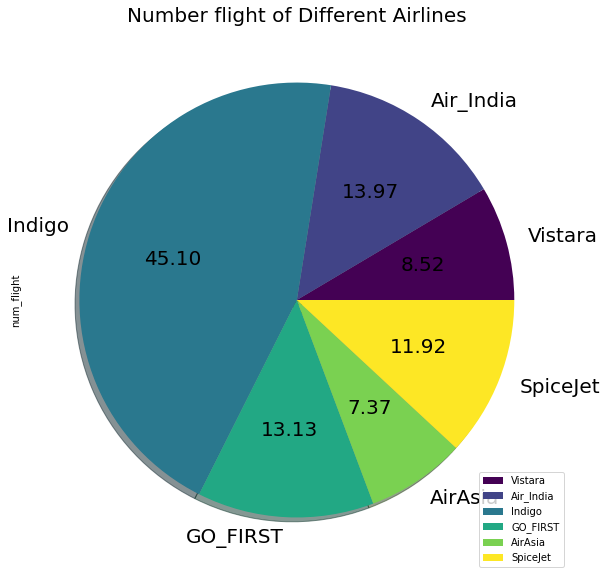

In [13]:
d={'num_flight':[133,218,704,205,115,186],'airline':['Vistara','Air_India','Indigo','GO_FIRST','AirAsia','SpiceJet']}
df=pd.DataFrame(data=d)
df=df.set_index('airline')
plt.figure(figsize=(12,10))
df['num_flight'].plot(kind='pie',textprops={'color':'black', 'fontsize': 20},autopct='%.2f',cmap='viridis', shadow=True)
plt.title('Number flight of Different Airlines',fontsize=20)
plt.legend(['Vistara','Air_India','Indigo','GO_FIRST','AirAsia','SpiceJet'])
plt.show()

### *that people's demand for airlines is not related to the number of flights for the company*

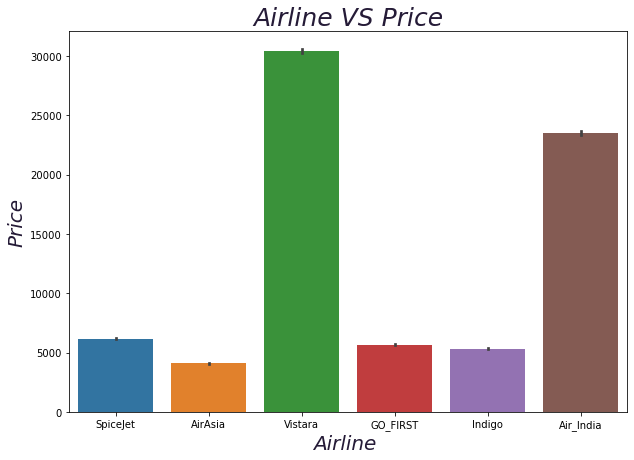

In [14]:
sns.barplot(data=data,x='airline',y='price')
plt.xlabel(fontsize=20,color='#251B37',xlabel='Airline ',fontstyle='italic')
plt.ylabel(fontsize=20,color='#251B37',ylabel='Price',fontstyle='italic')
plt.title(label='Airline VS Price',fontsize=25,color='#251B37',fontstyle='italic')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

### *Vistara price is six times higher than nearly the rest of other airlines.*

Text(0.5, 1.0, 'Price With Airline')

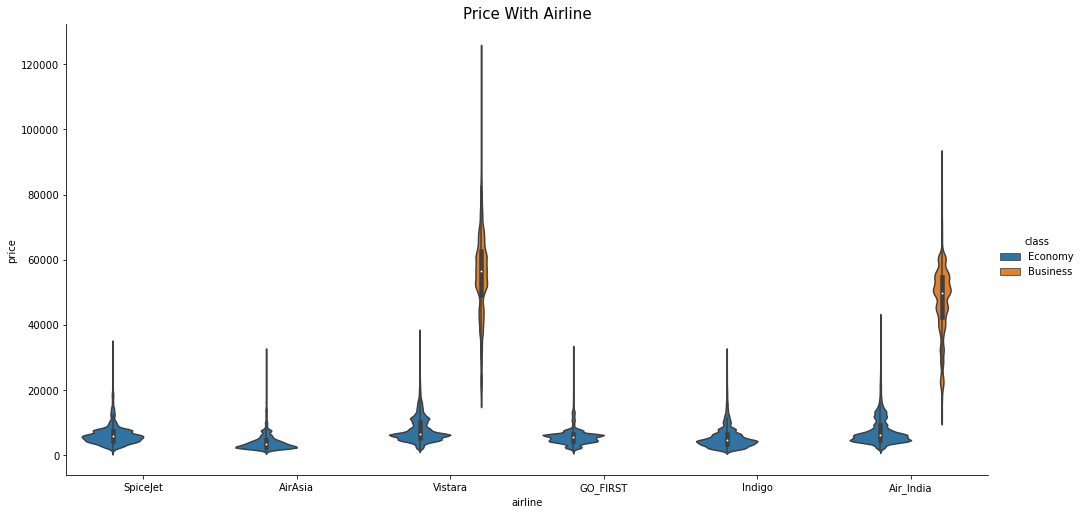

In [15]:
sns.catplot(kind='violin',data=data,x='airline',y='price',hue="class",aspect=2,height=7)
plt.title('Price With Airline',fontsize=15)


<Figure size 1800x720 with 0 Axes>

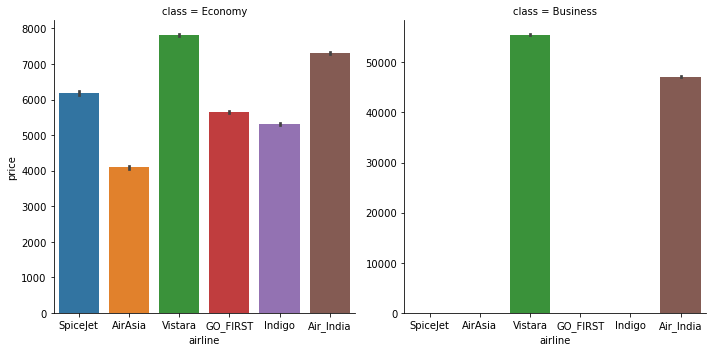

In [16]:
plt.figure(figsize=(25,10))    
sns.catplot(y='price', x='airline', data=data, kind='bar',col='class',sharey=False)
plt.show()

### *Vistara and Air_india are the customer choice for the business class booking.*

<br>

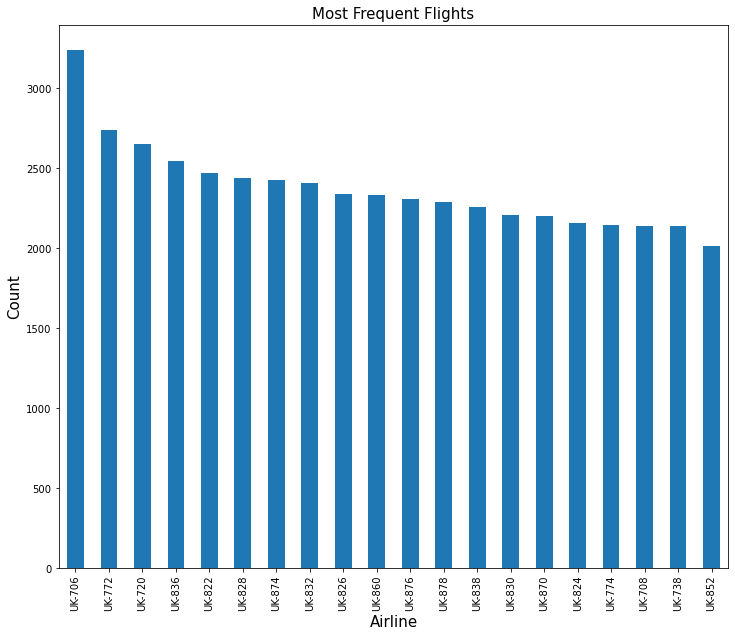

In [17]:
flights_Code = data.flight.value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(12,10))
# sns.countplot(flights_Code,palette='hls')
flights_Code.plot(kind='bar')
plt.title('Most Frequent Flights',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

### *Most frequent flights are from Delhi to Mumbai*

In [18]:
data[data['airline']=='Vistara'].groupby(['flight','airline']).count().head(10)

,,Unnamed: 0,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
flight,airline,,,,,,,,,,
UK-613,Vistara,371,371,371,371,371,371,371,371,371,371
UK-621,Vistara,113,113,113,113,113,113,113,113,113,113
UK-627,Vistara,151,151,151,151,151,151,151,151,151,151
UK-637,Vistara,401,401,401,401,401,401,401,401,401,401
UK-641,Vistara,6,6,6,6,6,6,6,6,6,6
UK-651,Vistara,354,354,354,354,354,354,354,354,354,354
UK-653,Vistara,515,515,515,515,515,515,515,515,515,515
UK-655,Vistara,209,209,209,209,209,209,209,209,209,209
UK-657,Vistara,755,755,755,755,755,755,755,755,755,755


### *All frequent trips are from the same company Vistara*

<br>

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


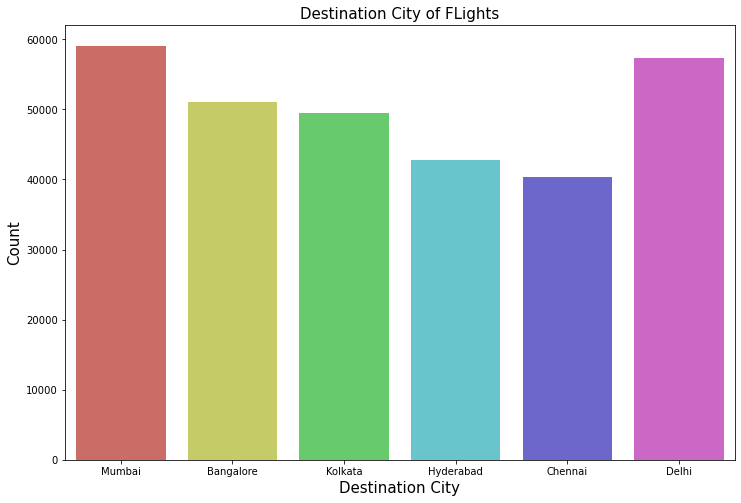

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(data['destination_city'],palette='hls')
plt.title('Destination City of FLights',fontsize=15)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

### *Mumbai and Delhi are the most attractive destinations for customers*

<br>

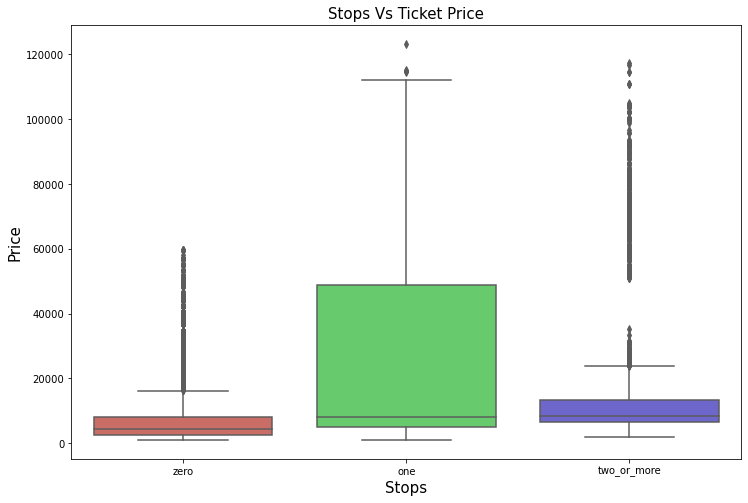

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='stops',y='price',data=data,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### *Flights having zero stop has maximum ticket price*

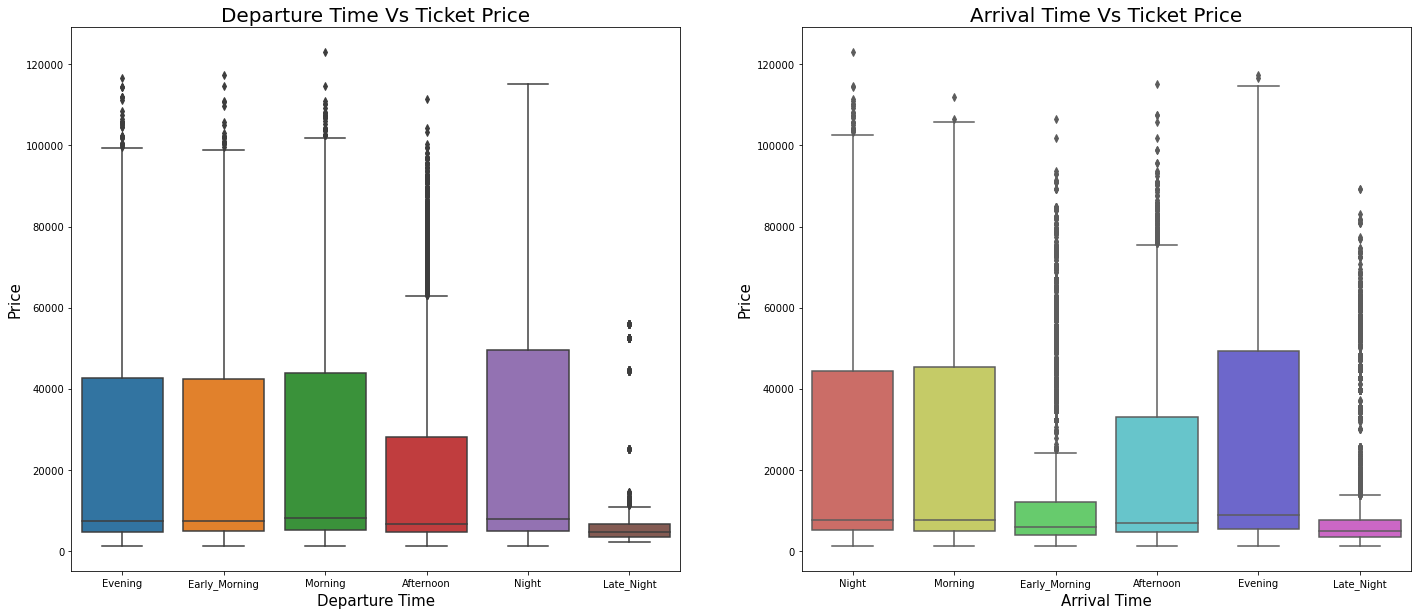

In [21]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=data)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=data,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### *Ticket Price is More for the Flights when the Departure Time is at Night*
### *Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening*
### *Ticket Price is Low for the Flights Having Departure Time at Late_night*

### *Ticket Price is More for the Flights when the Arrival Time is at Evening*
### *Ticket Price is almost equal for flights Having Arrival time is at Morning and Night*
### *Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time*

<br>

<br>

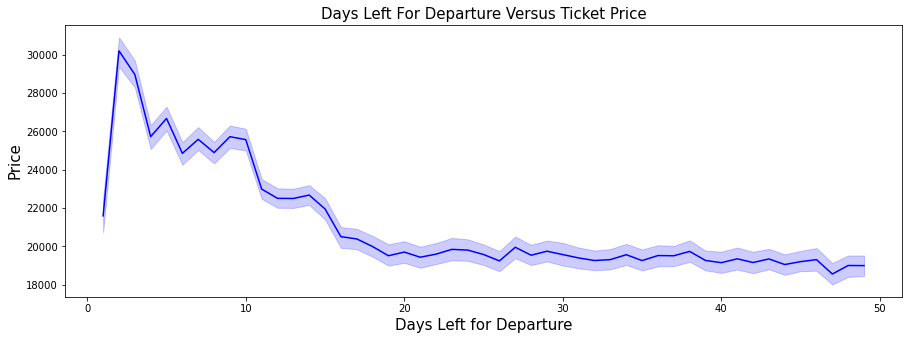

In [22]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### *Ticket price increases as the days left before departure decreases.*

<br>

## *Data preprocessing*

### *Checking for Nulls* 

In [23]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

*There is no missing values*

### *Checking for Duplicates* 

In [24]:
data.duplicated().sum()

0

### *Handling outliers* 

<AxesSubplot:xlabel='price', ylabel='Count'>

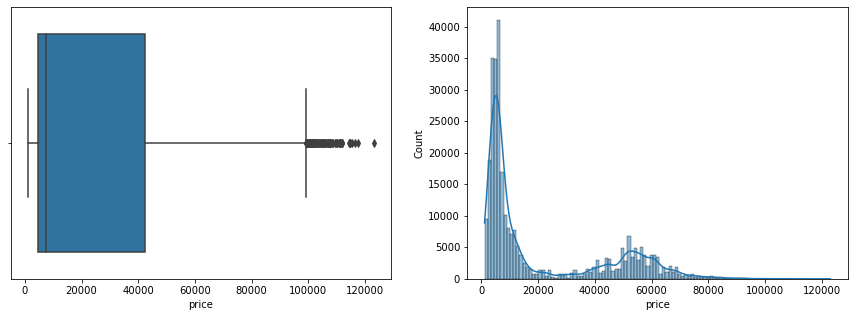

In [25]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = data)
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = data, kde = True)

<AxesSubplot:xlabel='duration'>

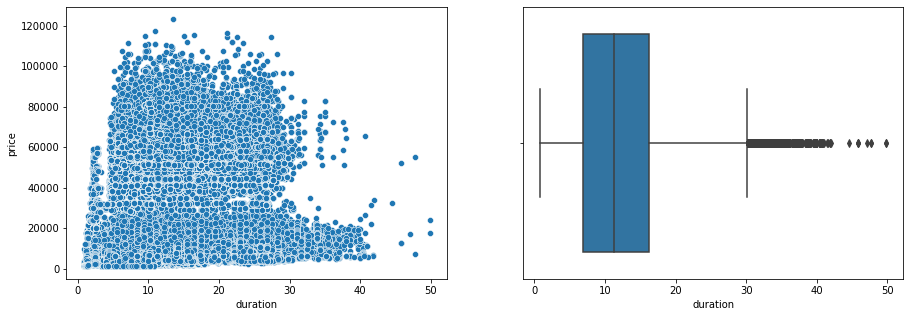

In [26]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=data,x='duration',y='price')
plt.subplot(1,2,2)
sns.boxplot(data=data,x='duration')


<AxesSubplot:xlabel='days_left'>

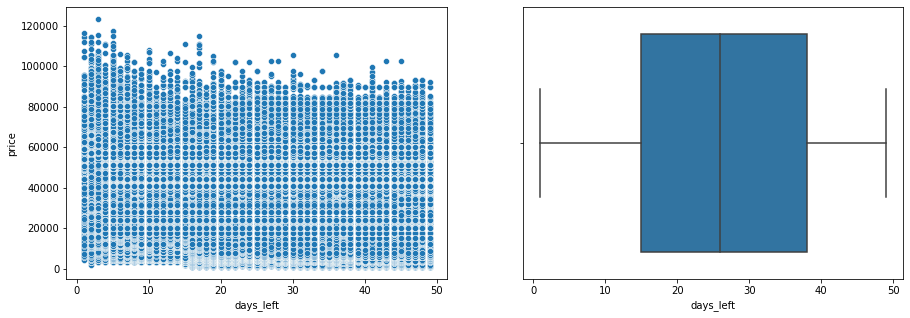

In [27]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=data,x='days_left',y='price')
plt.subplot(1,2,2)
sns.boxplot(data=data,x='days_left')


In [28]:
x=data[data['price']<100000]
x.shape

(300045, 12)

In [29]:
x=data[data['duration']>30]
x.shape

(2226, 12)

In [30]:
data=data[data['price']<100000]
data=data[data['duration']<30]

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297720 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        297720 non-null  int64  
 1   airline           297720 non-null  object 
 2   flight            297720 non-null  object 
 3   source_city       297720 non-null  object 
 4   departure_time    297720 non-null  object 
 5   stops             297720 non-null  object 
 6   arrival_time      297720 non-null  object 
 7   destination_city  297720 non-null  object 
 8   class             297720 non-null  object 
 9   duration          297720 non-null  float64
 10  days_left         297720 non-null  int64  
 11  price             297720 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 29.5+ MB


### *Data cleaning* 

In [32]:
# Drop Unnecessary Columns
data.drop('Unnamed: 0', axis=1, inplace=True)

### *Data Fitting & Splitting* 

In [33]:
le=LabelEncoder
airline_le=LabelEncoder()
data['airline']=airline_le.fit_transform(data['airline'])
flight_le=LabelEncoder()
data['flight']=flight_le.fit_transform(data['flight'])
source_city_le=LabelEncoder()
data['source_city']=source_city_le.fit_transform(data['source_city'])
departure_time_le=LabelEncoder()
data['departure_time']=departure_time_le.fit_transform(data['departure_time'])
stops_le=LabelEncoder()
data['stops']=stops_le.fit_transform(data['stops'])
arrival_time_le=LabelEncoder()
data['arrival_time']=arrival_time_le.fit_transform(data['arrival_time'])
destination_city_le=LabelEncoder()
data['destination_city']=destination_city_le.fit_transform(data['destination_city'])
class_le=LabelEncoder()
data['class']=class_le.fit_transform(data['class'])


In [34]:
airline_le.classes_

array(['AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet',
       'Vistara'], dtype=object)

In [35]:
flight_le.classes_

array(['6E-102', '6E-105', '6E-113', ..., 'UK-994', 'UK-995', 'UK-996'],
      dtype=object)

In [36]:
destination_city_le.classes_

array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)

In [37]:
class_le.classes_


array(['Business', 'Economy'], dtype=object)

In [38]:
data.corr()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.635802,-0.028967,0.057271,-0.030738,0.037378,-0.027150,-0.177537,0.007310,-0.012061,0.242182
flight,0.635802,1.000000,-0.009369,0.072334,-0.120081,0.067260,-0.034049,-0.259440,0.216234,-0.000940,0.305566
source_city,-0.028967,-0.009369,1.000000,-0.006713,0.002564,0.042966,-0.224786,0.001350,0.015501,-0.003799,0.003589
departure_time,0.057271,0.072334,-0.006713,1.000000,-0.007386,-0.045328,-0.002453,-0.053339,0.094472,-0.001649,0.058811
stops,-0.030738,-0.120081,0.002564,-0.007386,1.000000,0.010161,-0.011617,0.099855,-0.494524,-0.006215,-0.203460
arrival_time,0.037378,0.067260,0.042966,-0.045328,0.010161,1.000000,-0.037585,-0.027263,0.012036,-0.004488,0.041850
destination_city,-0.027150,-0.034049,-0.224786,-0.002453,-0.011617,-0.037585,1.000000,0.001077,-0.000370,-0.004968,0.005505
class,-0.177537,-0.259440,0.001350,-0.053339,0.099855,-0.027263,0.001077,1.000000,-0.153553,0.013693,-0.938736
duration,0.007310,0.216234,0.015501,0.094472,-0.494524,0.012036,-0.000370,-0.153553,1.000000,-0.033456,0.215879
days_left,-0.012061,-0.000940,-0.003799,-0.001649,-0.006215,-0.004488,-0.004968,0.013693,-0.033456,1.000000,-0.090955


In [39]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [40]:
x= data.drop(['price'] , axis=1).values
y = data['price'].values

In [41]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [42]:
x_train.shape

(238176, 10)

In [43]:
x_test.shape

(59544, 10)

### *Data Scaling using Robust scalar* 

In [44]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [45]:
x_train.shape

(238176, 10)

## *Modeling*

### *Linear Regression Model* 

In [46]:
reg = linear_model.LinearRegression()

In [47]:
reg.fit(x_train , y_train)

LinearRegression()

In [48]:
train_score_reg=reg.score(x_train,y_train)

In [49]:
test_score_reg=reg.score(x_test,y_test)

In [50]:
reg.coef_

array([  3573.87834132,    218.34120059,    319.61093769,    128.58930694,
        -3384.43955818,    568.72407177,    362.3188637 , -44473.06513009,
          665.85935604,  -2979.81695343])

In [51]:
pd.DataFrame(reg.coef_ , data.columns[:-1] , columns=['Coeficient'])

,Coeficient
airline,3573.878341
flight,218.341201
source_city,319.610938
departure_time,128.589307
stops,-3384.439558
arrival_time,568.724072
destination_city,362.318864
class,-44473.065130
duration,665.859356
days_left,-2979.816953


In [52]:
Y_pred = reg.predict(x_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(15)

,Y_test,Y_pred
0,2278,-375.029773
1,5402,3535.206826
2,49725,50943.673502
3,24056,45288.111446
4,55983,55029.364172
5,3000,-2096.355029
6,4697,7070.864995
7,6133,7104.080404
8,4202,3037.140147
9,6067,7641.027051


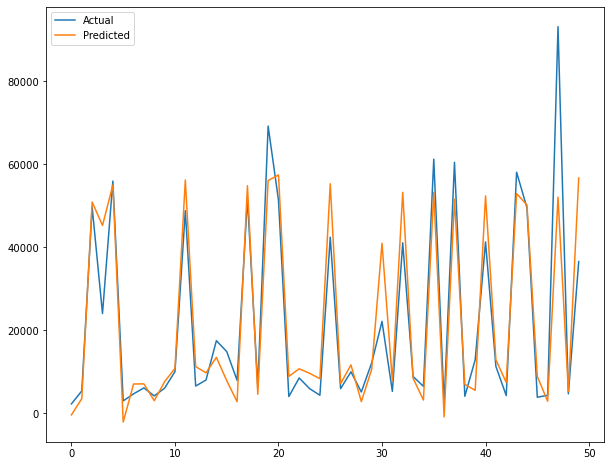

In [53]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [54]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import statsmodels.api as sm

In [55]:
y_pred_reg=reg.predict(x_test)
lin_score_reg = r2_score(y_test , y_pred_reg)
lin_score_reg

0.9051917413403039

In [56]:
p = len(x_train[0])
n = len(y_train)
adj_R2_reg = 1-(1-lin_score_reg)*(n-1)/(n-p-1)
adj_R2_reg

0.9051877605598089

In [57]:
lin_score_reg>adj_R2_reg

True

In [58]:
lin_mape_reg= mean_absolute_percentage_error(y_test,y_pred_reg)
lin_mape_reg

0.43855603622496286

In [59]:
mae_reg=mean_absolute_error(y_test,y_pred_reg)
mae_reg

4647.799872153755

In [60]:
mse_reg=mean_squared_error(y_test,y_pred_reg)
mse_reg

48924158.69168561

In [61]:
rmse_reg=mse_reg**0.5
rmse_reg

6994.580665893103

<br>

### *Ridge Regression Model* 

In [179]:
rid = linear_model.RidgeCV(alphas = (0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 20, 50))

In [180]:
rid.fit(x_train , y_train)

RidgeCV(alphas=array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1. , 10. , 20. , 50. ]))

In [181]:
train_score_rid=rid.score(x_train,y_train)

In [182]:
test_score_rid=rid.score(x_test,y_test)

In [183]:
y_pred =rid.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(10)

,Y_test,Y_pred
0,2278,-375.022758
1,5402,3535.304347
2,49725,50943.478776
3,24056,45287.948373
4,55983,55029.221487
5,3000,-2096.267134
6,4697,7070.950942
7,6133,7104.111594
8,4202,3037.160471
9,6067,7641.152008


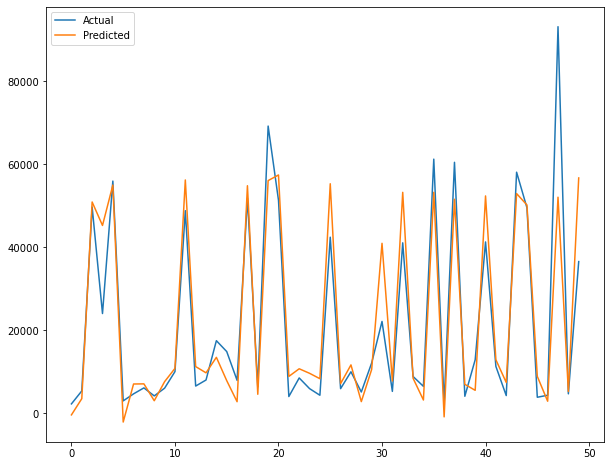

In [184]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [185]:
rid.alpha_
#best alpha

0.3

In [186]:
rid = linear_model.Ridge(alpha=0.3)
rid.fit(x_train, y_train)

Ridge(alpha=0.3)

In [187]:
train_score_rid=rid.score(x_train,y_train)

In [188]:
intercept_rid=rid.intercept_

In [189]:
y_pred_rid=rid.predict(x_test)

In [190]:
lin_score_rid = r2_score(y_test , y_pred_rid)
lin_score_rid

0.9051917164857896

In [191]:
adj_R2_rid = 1-(1-lin_score_rid)*(n-1)/(n-p-1)
adj_R2_rid

0.9051877357042509

In [192]:
lin_score_rid>adj_R2_rid

True

In [193]:
lin_mape_rid= mean_absolute_percentage_error(y_test,y_pred_rid)
lin_mape_rid

0.43855853660651073

In [194]:
mae_rid=mean_absolute_error(y_test,y_pred_rid)
mae_rid

4647.811968150542

In [195]:
mse_rid=mean_squared_error(y_test,y_pred_rid)
mse_rid

48924171.51742698

In [196]:
rmse_rid=mse_rid**0.5
rmse_rid

6994.581582727232

### *Lasso Regression Model* 

In [197]:
las = linear_model.Lasso(alphas = (0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 20, 50))
las.fit(x_train, y_train)

LassoCV(alphas=(0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 20, 50))

In [198]:
train_score_las=las.score(x_train,y_train)

In [199]:
test_score_las=las.score(x_test,y_test)

In [211]:
intercept_las=las.intercept_

In [201]:
las.alpha_

0.1

In [202]:
y_pred =las.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(10)

,Y_test,Y_pred
0,2278,-374.992345
1,5402,3536.071066
2,49725,50943.410570
3,24056,45287.819834
4,55983,55028.493045
5,3000,-2096.112014
6,4697,7071.397827
7,6133,7104.530277
8,4202,3037.015074
9,6067,7640.929740


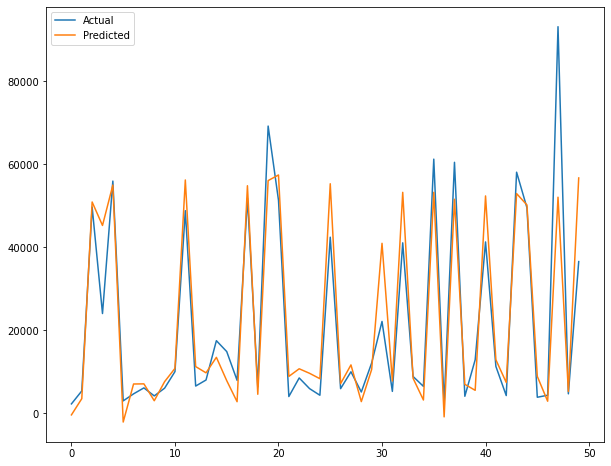

In [203]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [204]:
y_pred_las=las.predict(x_test)

In [205]:
lin_score_las = r2_score(y_test , y_pred_las)
lin_score_las

0.9051916535809661

In [206]:
adj_R2_las = 1-(1-lin_score_las)*(n-1)/(n-p-1)
adj_R2_las

0.9051876727967862

In [207]:
lin_score_las>adj_R2_las

True

In [89]:
lin_mape_las= mean_absolute_percentage_error(y_test,y_pred_las)
lin_mape_las

0.4384475852211946

In [208]:
mae_las=mean_absolute_error(y_test,y_pred_las)
mae_las

4647.747454679957

In [209]:
mse_las=mean_squared_error(y_test,y_pred_las)
mse_las

48924203.978370905

In [210]:
rmse_las=mse_las**0.5
rmse_las

6994.583903161853

<br>

### *Decision Tree Model* 

In [236]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_features':[5, 10],
              'max_depth':[3, 5, 7, 9]}

dt=DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dt, param_grid)
dt_grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9], 'max_features': [5, 10]})

In [237]:
dt_grid.best_params_

{'max_depth': 9, 'max_features': 10}

In [238]:
train_score_dt=dt_grid.score(x_train,y_train)

In [239]:
test_score_dt=dt_grid.score(x_test ,y_test)

In [240]:
y_pred =dt_grid.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(10)

,Y_test,Y_pred
0,2278,3197.934570
1,5402,5842.403474
2,49725,48729.428844
3,24056,24752.820225
4,55983,59171.279846
5,3000,2545.331325
6,4697,5290.737851
7,6133,4517.712752
8,4202,4568.174888
9,6067,6931.077062


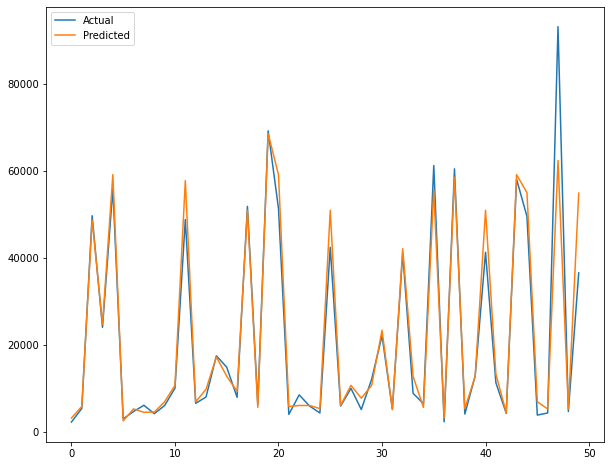

In [241]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [242]:
y_pred_dt=dt_grid.predict(x_test)

In [243]:
lin_score_dt = r2_score(y_test , y_pred_dt)
lin_score_dt
#0.9538148039180072

0.9619480152656825

In [244]:
adj_R2_dt = 1-(1-lin_score_dt)*(n-1)/(n-p-1)
adj_R2_dt
#0.9538128647079603

0.9619464175504543

In [245]:
lin_score_dt>adj_R2_dt

True

In [246]:
lin_mape_dt= mean_absolute_percentage_error(y_test,y_pred_dt)
lin_mape_dt

0.17490921706982793

In [247]:
mae_dt=mean_absolute_error(y_test,y_pred_dt)
mae_dt

2491.0239917726885

In [248]:
mse_dt=mean_squared_error(y_test,y_pred_dt)
mse_dt

19636067.216017324

In [249]:
rmse_dt=mse_dt**0.5
rmse_dt

4431.2602288759035

<br>

### *Random Forest Model*

In [250]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators':[10, 20, 30],
              'max_features':[5, 10],
              'max_depth':[3, 5, 7, 9]}

rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, param_grid)
rf_grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9], 'max_features': [5, 10],
                         'n_estimators': [10, 20, 30]})

In [251]:
rf_grid.best_params_

{'max_depth': 9, 'max_features': 5, 'n_estimators': 20}

In [252]:
train_score_rf=rf_grid.score(x_train,y_train)

In [253]:
test_score_rf=rf_grid.score(x_test,y_test)

In [254]:
y_pred =rf_grid.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(10)

,Y_test,Y_pred
0,2278,3163.492235
1,5402,5480.798582
2,49725,48951.262624
3,24056,26116.978509
4,55983,57118.389171
5,3000,2599.038263
6,4697,5517.087004
7,6133,4840.276911
8,4202,4672.453615
9,6067,6752.966562


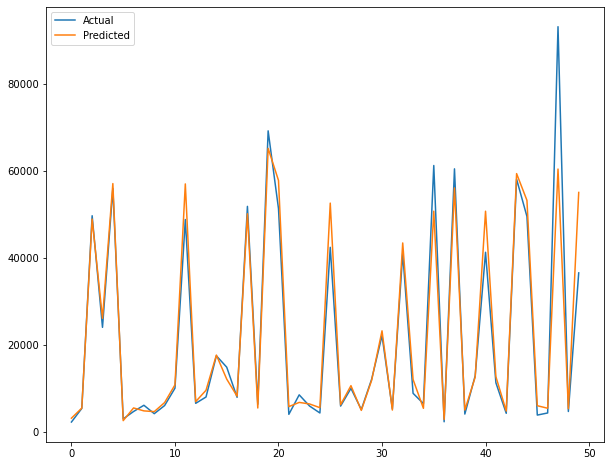

In [255]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [256]:
y_pred_rf=rf_grid.predict(x_test)

In [257]:
lin_score_rf = r2_score(y_test , y_pred_rf)
lin_score_rf
#0.955064838399264

0.9645747533179261

In [258]:
adj_R2_rf = 1-(1-lin_score_rf)*(n-1)/(n-p-1)
adj_R2_rf
#0.955062951675287

0.9645732658933808

In [259]:
lin_score_rf>adj_R2_rf

True

In [260]:
lin_mape_rf= mean_absolute_percentage_error(y_test,y_pred_rf)
lin_mape_rf

0.1717153632075289

In [261]:
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mae_rf

2446.596648568091

In [262]:
mse_rf=mean_squared_error(y_test,y_pred_rf)
mse_rf

18280584.5700304

In [263]:
rmse_rf=mse_rf**0.5
rmse_rf

4275.580027321486

<br>

In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [138]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics = ['accuracy'])

In [139]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          batch_size=128,epochs=100)

Epoch 1/100
1861/1861 [==============================] - 3s 1ms/step - loss: 161834864.0000 - accuracy: 0.0000e+00 - val_loss: 35032860.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
1861/1861 [==============================] - 2s 1ms/step - loss: 33729000.0000 - accuracy: 0.0000e+00 - val_loss: 33621460.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
1861/1861 [==============================] - 2s 1ms/step - loss: 32498054.0000 - accuracy: 0.0000e+00 - val_loss: 32081358.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
1861/1861 [==============================] - 2s 1ms/step - loss: 30658764.0000 - accuracy: 0.0000e+00 - val_loss: 30299046.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
1861/1861 [==============================] - 2s 1ms/step - loss: 28890832.0000 - accuracy: 0.0000e+00 - val_loss: 29023508.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
1861/1861 [==============================] - 2s 1ms/step - loss: 27882064.0000 - accuracy: 0.0000e+00 - val_loss: 28335618.0000 - val_accuracy: 0.0000e+

In [140]:
y_pred_ann = model.predict(x_test)

1861/1861 [==============================] - 1s 636us/step


In [128]:
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_ann.ravel()})
data.head(10)

,Y_test,Y_pred
0,2278,3010.146973
1,5402,4725.524902
2,49725,46872.023438
3,24056,24373.857422
4,55983,52834.500000
5,3000,2412.561523
6,4697,5585.069824
7,6133,4698.566895
8,4202,4293.262207
9,6067,5804.105957


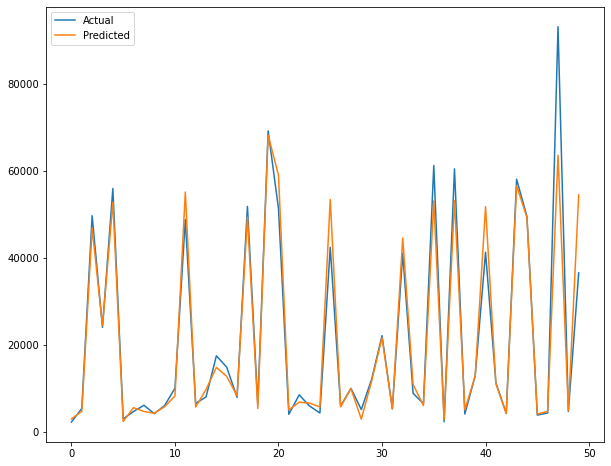

In [129]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [145]:
lin_score_ann = r2_score(y_test, y_pred_ann)
lin_score_ann

0.9599612969193654

In [146]:
adj_R2_ann = 1-(1-lin_score_ann)*(n-1)/(n-p-1)
adj_R2_ann

0.959959615786408

In [147]:
lin_score_ann>adj_R2_ann

True

In [148]:
lin_mape_ann= mean_absolute_percentage_error(y_test,y_pred_ann)
lin_mape_ann

0.18835761257956318

In [149]:
mae_ann=mean_absolute_error(y_test,y_pred_ann)
mae_ann

2629.9203738830556

In [150]:
mse_ann=mean_squared_error(y_test,y_pred_ann)
mse_ann

20661278.78539955

In [151]:
rmse_ann=mse_ann**0.5
rmse_ann

4545.467939101491

In [264]:
results={'Models':['Linear Regression','Ridge','Lasso','Decision Tree','Random Forest','ANN model'],
        "Train Score":[train_score_reg,train_score_rid,train_score_las,train_score_dt,train_score_rf, np.nan],
        "Test Score":[test_score_reg,test_score_rid,test_score_las,test_score_dt,test_score_rf, np.nan],
        'R2 Score':[lin_score_reg,lin_score_rid,lin_score_las,lin_score_dt,lin_score_rf, lin_score_ann],
        'Adj R2':[adj_R2_reg,adj_R2_rid,adj_R2_las,adj_R2_dt,adj_R2_rf,adj_R2_ann],
        'MAPE':[lin_mape_reg,lin_mape_rid,lin_mape_las,lin_mape_dt,lin_mape_rf,lin_mape_ann],
        'MAE':[mae_reg,mae_rid,mae_las,mae_dt,mae_rf,mae_ann],
        'MSE':[mse_reg,mse_rid,mse_las,mse_dt,mse_rf,mse_ann],
        'RMSE':[rmse_reg,rmse_rid,rmse_las,rmse_dt,rmse_rf,rmse_ann]}

In [265]:
df_results=pd.DataFrame(results)

In [266]:
df_results.set_index('Models')

,Train Score,Test Score,R2 Score,Adj R2,MAPE,MAE,MSE,RMSE
Models,,,,,,,,
Linear Regression,0.906154,0.905192,0.905192,0.905188,0.438556,4647.799872,4.892416e+07,6994.580666
Ridge,0.906154,0.905192,0.905192,0.905188,0.438559,4647.811968,4.892417e+07,6994.581583
Lasso,0.906154,0.905192,0.905192,0.905188,0.438448,4647.747455,4.892420e+07,6994.583903
Decision Tree,0.964510,0.961948,0.961948,0.961946,0.174909,2491.023992,1.963607e+07,4431.260229
Random Forest,0.966451,0.964575,0.964575,0.964573,0.171715,2446.596649,1.828058e+07,4275.580027
ANN model,NaN,NaN,0.959961,0.959960,0.188358,2629.920374,2.066128e+07,4545.467939


In [267]:
import statsmodels.api as sm

In [268]:
x2=sm.add_constant(x)
est=sm.OLS(y,x2)

In [269]:
est2=est.fit()

In [273]:
len(data)

59544

In [270]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 2.868e+05
Date:                Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:59:52   Log-Likelihood:            -3.0565e+06
No. Observations:              297720   AIC:                         6.113e+06
Df Residuals:                  297709   BIC:                         6.113e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.051e+04     70.841    713.075      0.0